In [ ]:
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
random_state = 42
data = pd.read_csv('new_data/clean-data_without_outliers.csv')
data.columns

In [ ]:
input_cols = ['pos','height','weight','award_count', 'college']

In [ ]:
def calculate_inputs(pca=False):
    inputs = data[input_cols].values

    if pca:
        pca = PCA(n_components=2, random_state=random_state)
        pca.fit(inputs)
        inputs = pca.transform(inputs)
    
    return inputs

def run_model(model, params, metric='euclidean'):
    inputs = calculate_inputs()
    clf = model(**params)
    clf = clf.fit(inputs)

    labels = clf.labels_

    silhouettes = silhouette_samples(inputs, labels, metric=metric)

    # order inputs, labels, silhouettes by labels, then by silhouettes
    inputs = inputs[np.lexsort((silhouettes, labels))]
    labels = labels[np.lexsort((silhouettes, labels))]
    silhouettes = silhouettes[np.lexsort((silhouettes, labels))]

    # plot the silhouette scores for each sample
    x = np.arange(len(inputs))
    plt.figure(figsize=(20, 10))
    plt.bar(x, silhouettes, width=0.5)
    plt.title('Silhouette scores')
    plt.show()

    print(f"Average silhouette score: { {i: silhouettes[labels == i].mean() for i in range(clf.n_clusters)} }")
    print(f"Total average silhouette score: {np.mean(silhouettes)}")

    # The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
    print(f"Variance Ratio Criterion: {calinski_harabasz_score(inputs, labels)}") 

    # The score is defined as the average similarity measure of each cluster with its most similar cluster, 
    # where similarity is the ratio of within-cluster distances to between-cluster distances. 
    # Thus, clusters which are farther apart and less dispersed will result in a better score.
    print(f"Davies-Bouldin score: {davies_bouldin_score(inputs, labels)}")
    
    return clf

def figure_out_best_k(model, params, metric='euclidean', min_clusters=2, max_clusters=10):
    """
    This unfortunately cannot be done automatically, must choose manually after interpreting the graphs.
    """    
    inputs = calculate_inputs()

    clf = model(**params)

    visualizer = KElbowVisualizer(clf, k=(min_clusters, max_clusters), distance_metric=metric, timings=False)
    visualizer.fit(inputs)
    visualizer.show()

    silhouettes = []
    K = range(min_clusters, max_clusters)
    for k in K:
        clf = model(**params, n_clusters=k)
        clf.fit(inputs)
        silhouettes.append(silhouette_score(inputs, clf.labels_, metric=metric))

    best_k_silhouette = np.argmax(silhouettes) + min_clusters

    plt.figure(figsize=(4,2))
    plt.plot(K, silhouettes, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average silhouette width')
    plt.title('Silhouette-based Method showing the optimal k')
    plt.show()
 
    return visualizer.elbow_value_, best_k_silhouette

def use_model(model, params=None, metric='euclidean', min_clusters=2, max_clusters=10):
    if params is None:
        params = {}
    
    print("Finding best k...")
    elbow, silhouette = figure_out_best_k(model, params, metric, min_clusters, max_clusters)
    print("=========================================")
    print(f"Using best k from elbow method: {elbow}")
    run_model(model, {**params, 'n_clusters': elbow}, metric)
    print("=========================================")
    print(f"Using best k from silhouette method: {silhouette}")
    run_model(model, {**params, 'n_clusters': silhouette}, metric)

In [ ]:
use_model(KMeans, {'random_state': random_state}, metric='euclidean')

Finding best k...


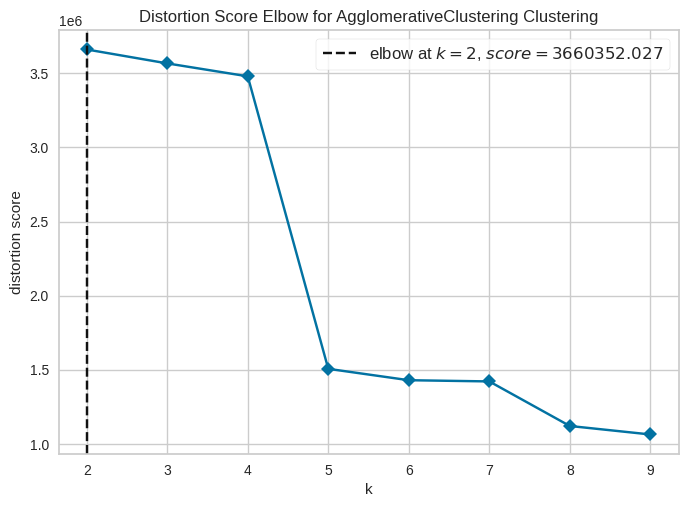

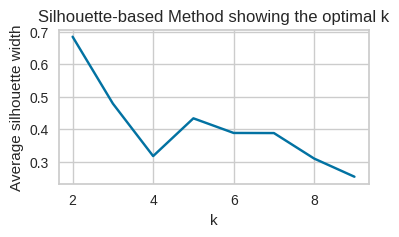

Using best k from elbow method: 2


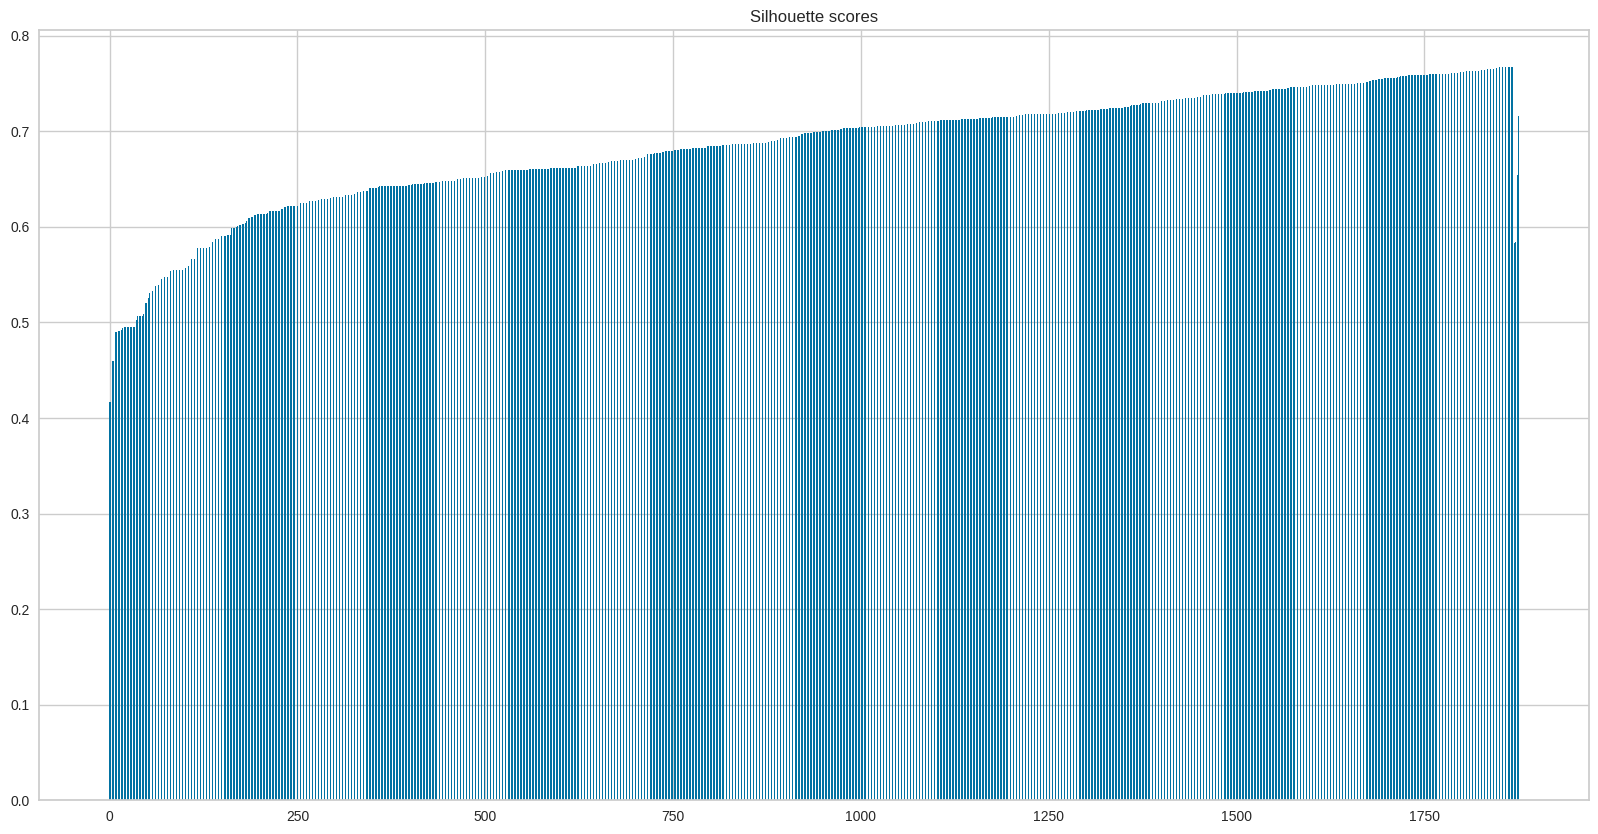

Average silhouette score: {0: 0.684379291285071, 1: 0.6320229751568707}
Total average silhouette score: 0.684183931896533
Variance Ratio Criterion: 100.59838661821246
Davies-Bouldin score: 0.4537125019369166
Using best k from silhouette method: 2


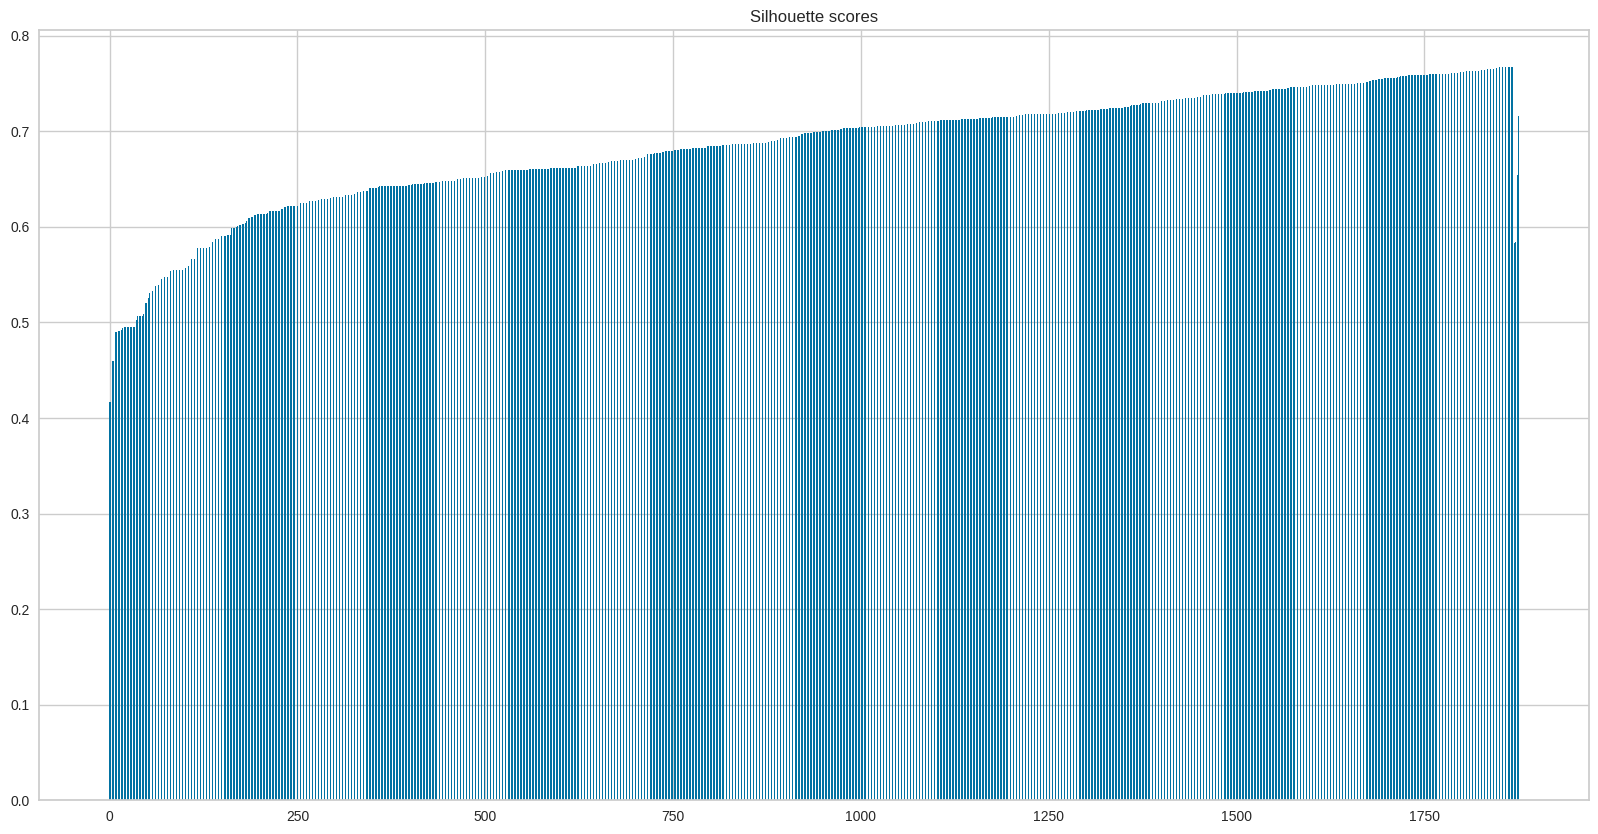

Average silhouette score: {0: 0.684379291285071, 1: 0.6320229751568707}
Total average silhouette score: 0.684183931896533
Variance Ratio Criterion: 100.59838661821246
Davies-Bouldin score: 0.4537125019369166


In [19]:
use_model(AgglomerativeClustering, {'linkage': 'average'}, metric='euclidean')

Finding best k...


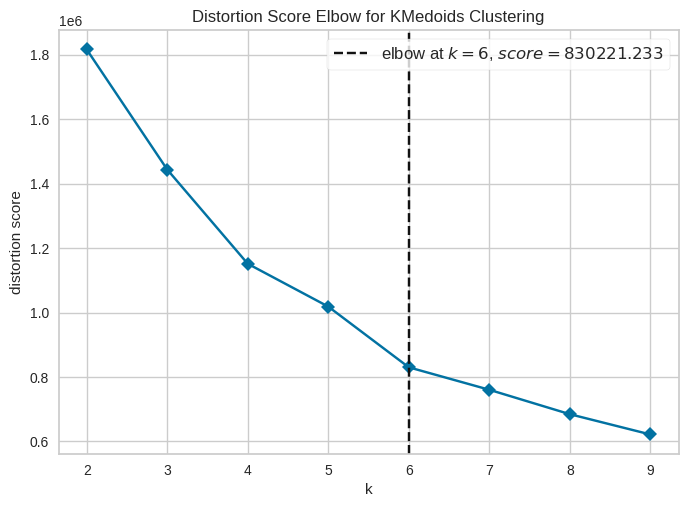

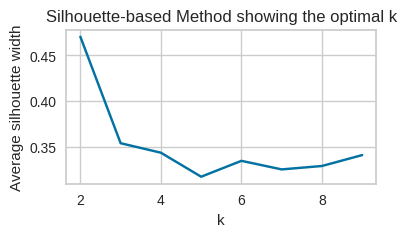

Using best k from elbow method: 6


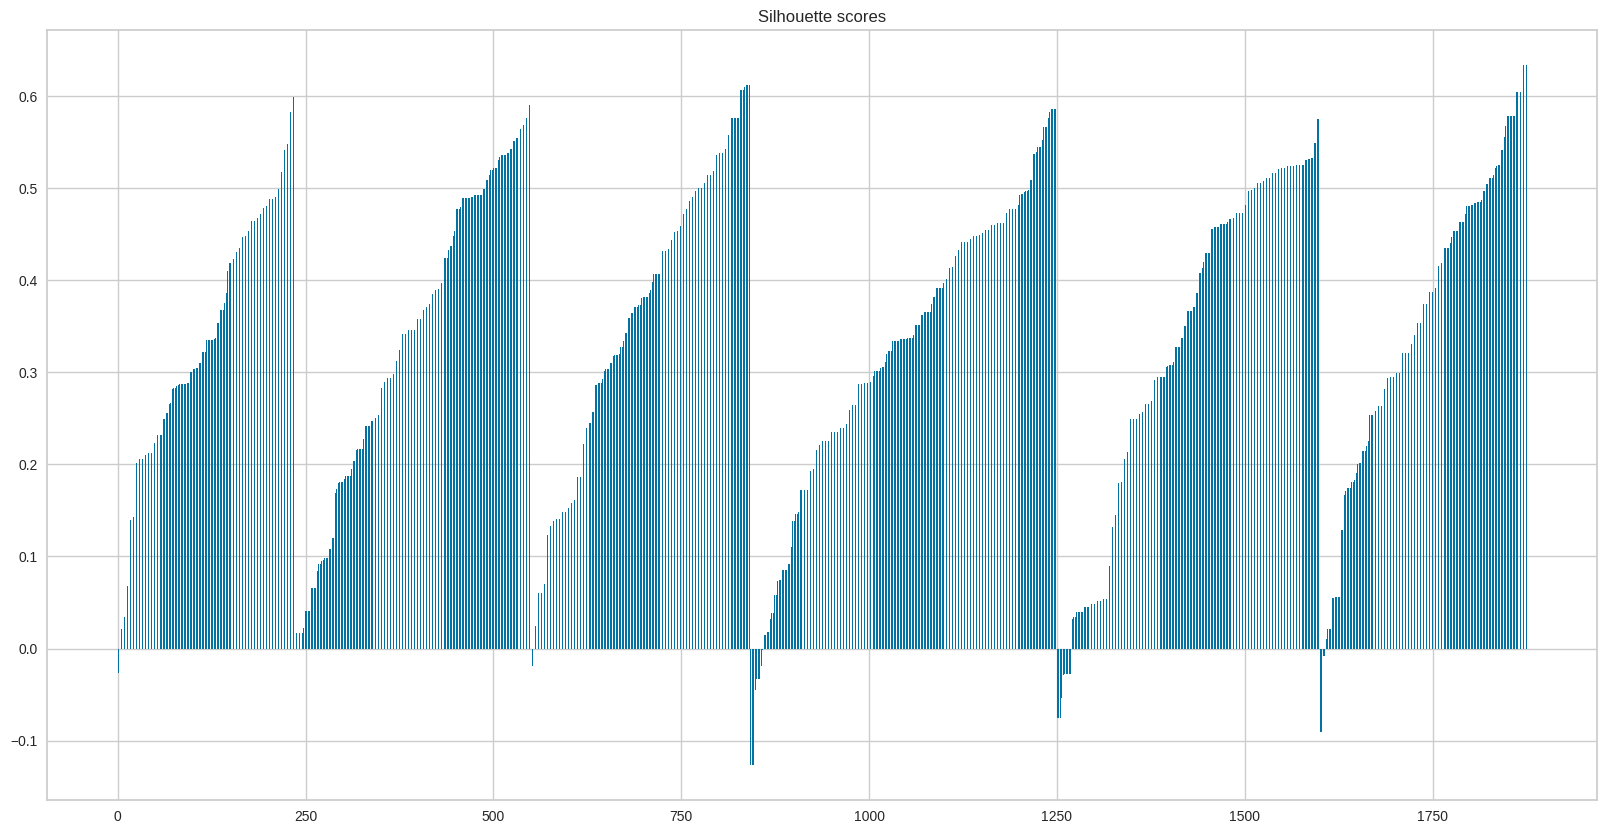

Average silhouette score: {0: 0.33646933906346005, 1: 0.3327962944370886, 2: 0.3545820709214449, 3: 0.3193997622431042, 4: 0.3257634970929044, 5: 0.35139222733309244}
Total average silhouette score: 0.33515617439662637
Variance Ratio Criterion: 1363.439984755334
Davies-Bouldin score: 0.9664697967017243
Using best k from silhouette method: 2


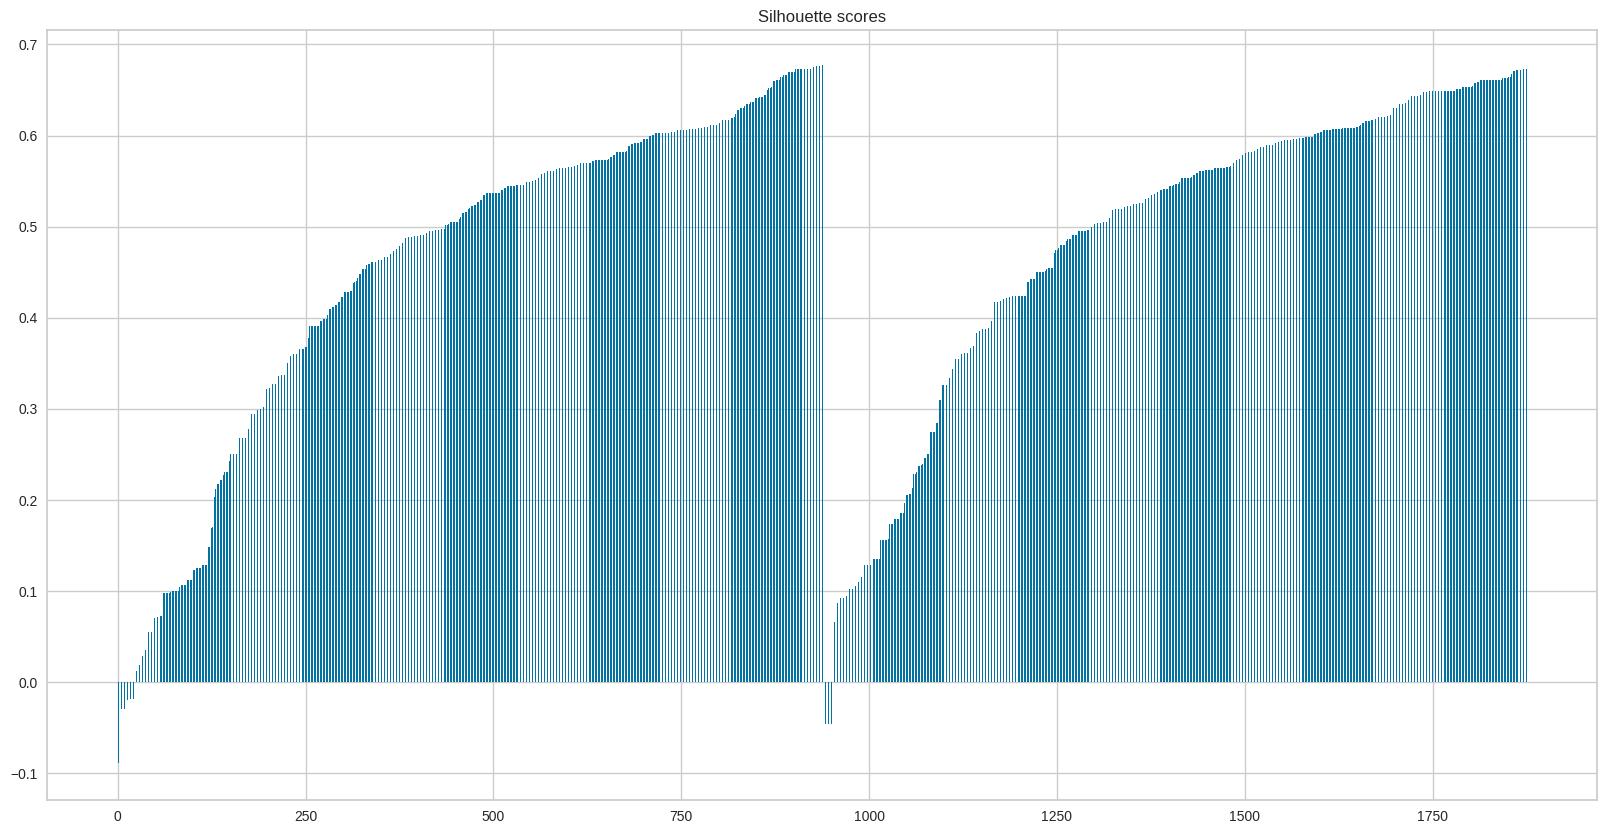

Average silhouette score: {0: 0.45450225896089064, 1: 0.4863891250325304}
Total average silhouette score: 0.4703777029432529
Variance Ratio Criterion: 2104.697080093291
Davies-Bouldin score: 0.8147094662888342


In [20]:
use_model(KMedoids, {'method': 'pam', 'init': 'heuristic', 'max_iter': 300}, metric='euclidean')

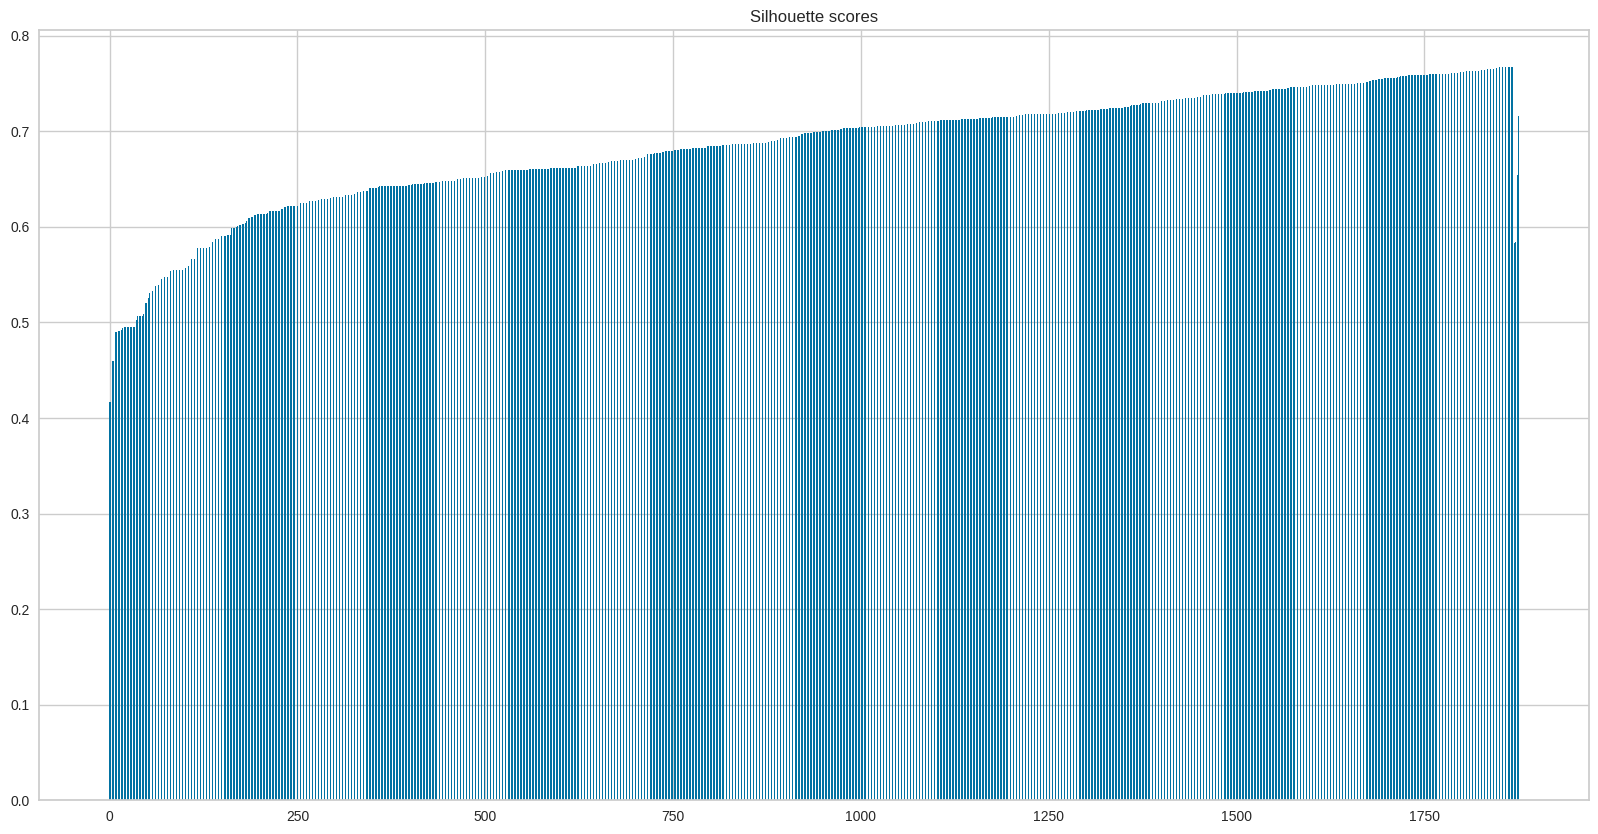

Average silhouette score: {0: 0.684379291285071, 1: 0.6320229751568707}
Total average silhouette score: 0.684183931896533
Variance Ratio Criterion: 100.59838661821246
Davies-Bouldin score: 0.4537125019369166


,playerID,year,stint,tmID,GP,oRebounds,dRebounds,dq,PostMinutes,PostPoints,...,mpg,pos,college,playoff,confID,playoff_progression,height,weight,award_count,player_probs
0,abrossv01w,2,0,MIN,26,1.65,5.04,0.08,0.00,0.00,...,32.54,2,20,0,WE,0,74.0,169,0,0
1,abrossv01w,3,0,MIN,27,1.67,3.74,0.00,0.00,0.00,...,29.81,2,20,0,WE,0,74.0,169,0,0
2,abrossv01w,4,0,MIN,30,1.47,3.23,0.00,23.00,7.67,...,26.40,2,20,1,WE,1,74.0,169,0,0
3,abrossv01w,5,0,MIN,22,0.77,2.59,0.00,33.50,10.00,...,21.00,2,20,1,WE,1,74.0,169,0,0
4,abrossv01w,6,0,MIN,31,0.94,2.52,0.00,0.00,0.00,...,25.06,2,20,0,WE,0,74.0,169,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,zakalok01w,3,2,PHO,5,0.00,0.60,0.00,0.00,0.00,...,7.40,3,0,0,WE,0,78.0,174,0,0
1872,zarafr01w,6,0,SEA,34,0.32,0.82,0.00,8.67,3.67,...,12.15,1,0,1,WE,1,70.0,146,0,0
1873,zellosh01w,10,0,DET,34,0.74,2.38,0.09,29.00,15.60,...,23.59,1,83,1,EA,2,70.0,155,0,0
1874,zirkozu01w,4,0,WAS,6,0.00,0.33,0.00,0.00,0.00,...,5.00,1,0,0,EA,0,69.0,145,0,0


In [21]:
clf = run_model(AgglomerativeClustering, {'linkage': 'average', 'n_clusters': 2}, metric='euclidean')
data['player_probs'] = clf.labels_
data

SAVE DATA

In [23]:
data.to_csv('new_data/clean-data_transformed_with_cluster.csv', index=False)

df = data.sort_values(by='year')
competition = df[df['playoff'].isna()]
data = df[~df['playoff'].isna()]

data.to_csv('new_data/clean-data_dev_transformed_with_cluster.csv', index=False)
competition.to_csv('new_data/clean-data_comp_transformed_with_cluster.csv', index=False)